# Basics of cluster analysis

In this notebook we explore the very basics of cluster analysis with k-means.

- Euclidean distance between two points.
- Centroid - The mean position of a group of points, the center of mass.
- Steps:
    - Choose the number of clusters to start with.
    - Specify the cluster seeds.
    - Assign each point on the chart to a seed.
    - The seeds will be adjusted or recalculated to become the centroids for each cluster.
    - Assign points to centroids again, recalculate centroids again, repeat until all points assigned and no more centroid adjusting is needed.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the styles to Seaborn
sns.set()

# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [2]:
# Load the country clusters data
df = pd.read_csv('../country_clusters.csv')

In [3]:
# Check out the data manually 
df.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


## Plot the data

- Use the simplest code possible to create a scatter plot using the longitude and latitude.
- Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x.

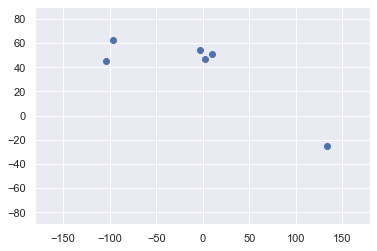

In [4]:
plt.scatter(df['Longitude'],df['Latitude'])

# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)

plt.show()

## Select the features

- `iloc` is a method used to 'slice' data.
- 'slice' is not technically correct as there are methods 'slice' which are a bit different; the term used by pandas is 'selection by position'

In [5]:
df.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


In [6]:
# Choose only columns at index 1 and 2.

X = df.iloc[:,1:3]

In [7]:
# Check if we worked correctly
X

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

This is the part of the sheet which deals with the actual clustering

In [8]:
# Create our kmeans object

kmeans = KMeans(3)

In [9]:
# Fit the input data, i.e. cluster the data in X in K clusters

kmeans.fit(X)

KMeans(n_clusters=3)

## Clustering results

There are many ways to do this part, we found this to be the most illustrative one

In [17]:
# Create a variable which will contain the predicted clusters for each observation

identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([1, 1, 0, 0, 0, 2], dtype=int32)

In [18]:
# Create a copy of the data

data_with_clusters = df.copy()

In [19]:
# Create a new column containing the identified cluster for each observation

data_with_clusters['Geo_Cluster'] = identified_clusters

In [20]:
# Check the result
data_with_clusters

,Country,Latitude,Longitude,Language,Geo_Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


## Plot the data using the longitude and the latitude
- c (color) is an argument which could be coded with a variable 
- The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
- All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
- cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html

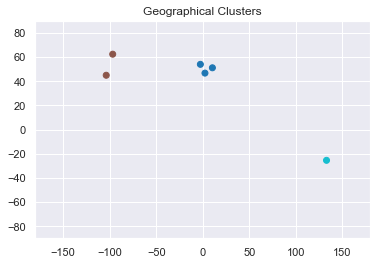

In [30]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Geo_Cluster'],cmap='tab10')

plt.xlim(-180,180)
plt.ylim(-90,90)

plt.title('Geographical Clusters')
plt.show()

## Cluster Using Language

In [22]:
data_with_clusters['Encode_Lang'] = data_with_clusters['Language'].map({'English': 0, 'French': 1, 'German': 2})
data_with_clusters

,Country,Latitude,Longitude,Language,Geo_Cluster,Encode_Lang
0,USA,44.97,-103.77,English,1,0
1,Canada,62.40,-96.80,English,1,0
2,France,46.75,2.40,French,0,1
3,UK,54.01,-2.53,English,0,0
4,Germany,51.15,10.40,German,0,2
5,Australia,-25.45,133.11,English,2,0


In [23]:
# Choose feature to cluster on.

x = data_with_clusters[['Encode_Lang']]

In [24]:
kmeans2 = KMeans(3)
kmeans2

KMeans(n_clusters=3)

In [25]:
kmeans2.fit(x)

KMeans(n_clusters=3)

In [27]:
data_with_clusters['Lang_Cluster'] = kmeans2.fit_predict(x)
data_with_clusters

,Country,Latitude,Longitude,Language,Geo_Cluster,Encode_Lang,Lang_Cluster
0,USA,44.97,-103.77,English,1,0,0
1,Canada,62.40,-96.80,English,1,0,0
2,France,46.75,2.40,French,0,1,2
3,UK,54.01,-2.53,English,0,0,0
4,Germany,51.15,10.40,German,0,2,1
5,Australia,-25.45,133.11,English,2,0,0


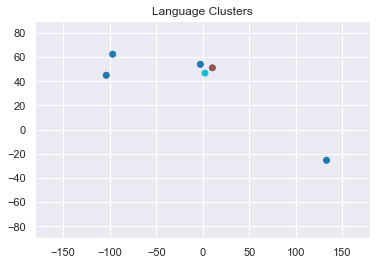

In [29]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Lang_Cluster'],cmap='tab10')

plt.xlim(-180,180)
plt.ylim(-90,90)

plt.title('Language Clusters')
plt.show()